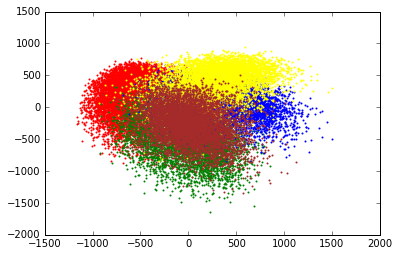

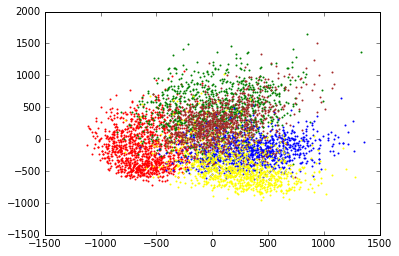

30658 [ 1.  2.  4.  7.  8.]
{8.0: 4, 1.0: 0, 2.0: 1, 4.0: 2, 7.0: 3}
confusion_matrix [[ 6327.    88.    85.    98.   144.]
 [  575.  4748.   213.   110.   312.]
 [  356.   183.  4317.   744.   242.]
 [  511.   139.   772.  4690.   153.]
 [  850.   597.   415.   240.  3749.]]
([0.91170330745645511, 0.92768608519799078, 0.9018200795877096, 0.90974623263096088, 0.90367930067192903], 0.91092700110900915)
PPV [ 0.73407588  0.82502172  0.74405377  0.79734784  0.815     ]


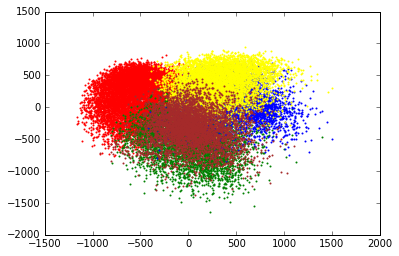

30658 [ 1.  2.  4.  7.  8.]
{8.0: 4, 1.0: 0, 2.0: 1, 4.0: 2, 7.0: 3}
confusion_matrix [[ 898.   64.    2.   16.  155.]
 [ 324.   28.  468.  160.   52.]
 [  15.  624.  210.  111.   22.]
 [  64.  271.  133.  101.  459.]
 [ 134.  101.   31.  601.  107.]]
([0.84973791496796736, 0.59930110658124636, 0.72704329256455058, 0.64764123471170643, 0.69811687051058047], 0.70436808386721028)
PPV [ 0.62578397  0.02573529  0.24881517  0.10212336  0.13459119]


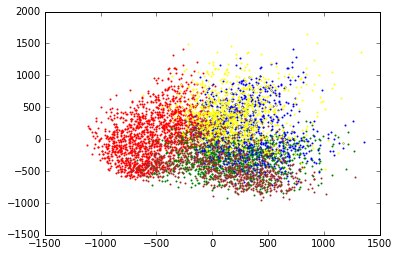

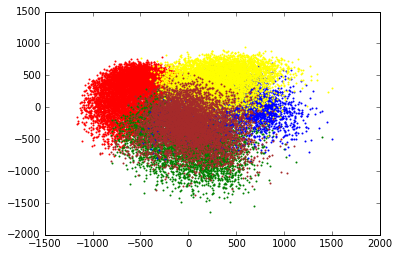

[[ 6055.   167.   133.   174.   213.]
 [  335.  4914.   213.   132.   364.]
 [  201.   177.  4474.   666.   324.]
 [  337.   134.   666.  4863.   265.]
 [  463.   606.   366.   181.  4235.]]
([0.93401396046708851, 0.93058907952247372, 0.91043120881988393, 0.91666123034770697, 0.90925696392458744], 0.92019048861634811)
PPV [ 0.81923962  0.81927309  0.76452495  0.80834441  0.78411405]


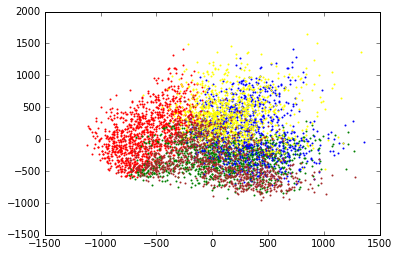

[[ 759.  151.    3.   21.  201.]
 [ 267.   38.  465.  192.   70.]
 [   6.  607.  215.  110.   44.]
 [  28.  249.  183.   72.  496.]
 [  81.  101.   36.  585.  171.]]
([0.85284410794020582, 0.59192389827218017, 0.71772471364783541, 0.63812851873422638, 0.68666278392545133], 0.69745680450397984)
PPV [ 0.66520596  0.03315881  0.2383592   0.07346939  0.17413442]


In [4]:
import struct
import numpy as np
from pylab import *
from numpy import *
import matplotlib.pyplot as plt
from openpyxl import Workbook
from sklearn import linear_model, svm

def load_nmnist(dataset="training", selecteddigits=range(10), path=r'NMNIST_data'):

    if dataset == "training":
        fname_img = path + '/' + 'NMNIST_Train_Features.dat'
        fname_lbl = path + '/' + 'NMNIST_Train_Labels.dat'
    elif dataset == "testing":
        fname_img = path + '/' + 'NMNIST_Test_Features.dat'
        fname_lbl = path + '/' + 'NMNIST_Test_Labels.dat'
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    lbl = np.fromfile(flbl, dtype=np.uint8)
    flbl.close()

    fimg = open(fname_img, 'rb')
    img = np.fromfile(fimg, dtype=np.uint8)
    fimg.close()

    size=len(lbl)

    ind = [ k for k in range(size) if lbl[k] in selecteddigits ]
    N = len(ind)

    rows=28;cols=28;

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]
    
    flatimages = list()
    for i in images:
        flatimages.append(i.ravel())

    return asarray(flatimages), labels

def vectortoimg(v,title='Missing'):
    plt.imshow(v.reshape(28, 28),interpolation='None', cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.show()

def point_cloud(pt,color):
    clr = ['red','green','blue','yellow','brown']
    lbl = [1,2,4,7,8]
    for i in range(len(lbl)):
        x = [pt[j][0] for j in range(len(pt[:,0])) if color[j]==lbl[i]]
        y = [pt[j][1] for j in range(len(pt[:,1])) if color[j]==lbl[i]]
        plt.scatter(x,y, color=clr[i], s=1)
    plt.show()

def array2excel(x,filename):
    wb = Workbook()
    ws = wb.active
    for i in range(len(x)):
        ws.append(x[i])
    wb.save(filename)

def matrix2excel(x,filename):
    from openpyxl import Workbook
    wb = Workbook()
    ws = wb.active
    for i in range(len(x)):
        ws.append(x[i])
    wb.save(filename)
    
def linear_classifier(X,Y,X1,T1):
    rows = len(Y)
    classes = np.unique(Y) 
    print (rows, classes)
    label_dict = {v:k for k,v in enumerate(classes)}
    print (label_dict)
    T = np.ones((rows,len(classes))) * -1
    for i in range(rows):
        T[i,label_dict[Y[i]]] = 1
    Xa = np.hstack((np.ones((rows,1)),X))
    Xa_pseudoinverse = np.linalg.pinv(Xa)
    w = np.dot(Xa_pseudoinverse, T)
    res_label = {4:8, 0:1, 1:2, 2:4, 3:7}
    res=[]
    confusion_matrix = np.zeros((len(classes),len(classes)))
    for i in range(len(X1)):
        pred = np.dot(np.append([1],X1[i]),w)
        pred_list = pred.tolist()
        pred_res = pred_list.index(max(pred_list))
        res.append(res_label[pred_res])
        confusion_matrix[label_dict[T1[i]],pred_res] += 1
    print('confusion_matrix', confusion_matrix)
    print (confusion_matrix_accuracy(np.array(confusion_matrix)))
    ppv = np.zeros(len(classes)).astype('float')
    for i in range(len(classes)):
        ppv[i] = confusion_matrix[i,i]/np.sum(confusion_matrix[:,i])
    print('PPV', ppv)
    point_cloud(X1,res)
    return confusion_matrix

def confusion_matrix_accuracy(cm):
    acc = []
    for i in range(len(cm)):
        top = cm[i,i]
        for j in range(len(cm)):
            for k in range (len(cm)):
                if i!=j and i!=k:
                    top += cm[j,k]
        acc.append(top/np.sum(cm))
    return acc, sum(acc)/len(cm)

def PCA(X,T,debug=False):
    mean = np.mean(X,axis=0)
    if debug:
        print('X',np.shape(X))
        vectortoimg(np.transpose(mean),title='Mean')
        print('mean',np.shape(mean))
    Z = X - mean
    C = np.cov(Z,rowvar=False)
    if debug:
        print ('Z',np.shape(Z))
        print ('C',np.shape(C))
        vectortoimg(C[100],title='C[100]')
    val, V = np.linalg.eigh(C)
    V = np.flipud(V.T)
    if debug:
        print('V', np.shape(V))
        vectortoimg(V[0],title='V[0]')
        vectortoimg(V[1],title='V[1]')
    P = np.dot(Z,V.T)
    if debug:
        print ('P', np.shape(P))
    point_cloud(P[:,0:2],T)
    
    return np.hstack((P[:,0:5],T))

if __name__ == '__main__':
    debug = False
    selecteddigits = [1,2,4,7,8]
    
    tst_ft, tst_lbl = load_nmnist(dataset="training",selecteddigits=selecteddigits)
    P = PCA(tst_ft,tst_lbl,debug)

    trn_ft, trn_lbl = load_nmnist(dataset="testing",selecteddigits=selecteddigits)
    P1 = PCA(trn_ft,trn_lbl,debug)

    linear_classifier(P[:,0:5],P[:,5],P[:,0:5],P[:,5])
    linear_classifier(P[:,0:5],P[:,5],P1[:,0:5],P1[:,5])
    
    logreg = linear_model.LogisticRegression(C=1e5)

    classes = np.unique(P[:,5])
    label_dict = {v:k for k,v in enumerate(classes)}
    logreg.fit(P[:,0:5],P[:,5])

    Z = logreg.predict(P[:,0:5])
    point_cloud(P[:,0:5],Z)
    confusion_matrix = np.zeros((len(classes),len(classes)))
    for i in range(len(Z)):
        confusion_matrix[label_dict[P[i,5]],label_dict[Z[i]]] += 1
    print (confusion_matrix)
    print (confusion_matrix_accuracy(np.array(confusion_matrix)))
    ppv = np.zeros(len(classes)).astype('float')
    for i in range(len(classes)):
        ppv[i] = confusion_matrix[i,i]/np.sum(confusion_matrix[:,i])
    print('PPV', ppv)

    Z1 = logreg.predict(P1[:,0:5])
    point_cloud(P1[:,0:5],Z1)
    confusion_matrix = np.zeros((len(classes),len(classes)))
    for i in range(len(Z1)):
        confusion_matrix[label_dict[P1[i,5]],label_dict[Z1[i]]] += 1
    print (confusion_matrix)
    print (confusion_matrix_accuracy(np.array(confusion_matrix)))
    ppv = np.zeros(len(classes)).astype('float')
    for i in range(len(classes)):
        ppv[i] = confusion_matrix[i,i]/np.sum(confusion_matrix[:,i])
    print('PPV', ppv)
    
    
    '''
    svm_mdl = svm.SVC(kernel='linear', C=1)
    svm_mdl.fit(P[:,0:5],P[:,5])

    Z = svm_mdl.predict(P[:,0:5])
    point_cloud(P[:,0:5],Z)
    confusion_matrix = np.zeros((len(classes),len(classes)))
    for i in range(len(Z)):
        confusion_matrix[label_dict[P[i,5]],label_dict[Z[i]]] += 1
    print (confusion_matrix)

    Z1 = svm_mdl.predict(P1[:,0:5])
    point_cloud(P1[:,0:5],Z1)
    confusion_matrix = np.zeros((len(classes),len(classes)))
    for i in range(len(Z1)):
        confusion_matrix[label_dict[P1[i,5]],label_dict[Z1[i]]] += 1
    print (confusion_matrix)'''

In [1]:
from sklearn import svm, datasets

svm_mdl = svm.SVC(kernel='linear', C=1)
svm_mdl.fit(P[:,0:5],P[:,5])

Z = svm_mdl.predict(P[:,0:5])
point_cloud(P[:,0:5],Z)
confusion_matrix = np.zeros((len(classes),len(classes)))
for i in range(len(Z)):
    confusion_matrix[label_dict[P[i,5]],label_dict[Z[i]]] += 1
print (confusion_matrix)

Z1 = svm_mdl.predict(P1[:,0:5])
point_cloud(P1[:,0:5],Z1)
confusion_matrix = np.zeros((len(classes),len(classes)))
for i in range(len(Z1)):
    confusion_matrix[label_dict[P1[i,5]],label_dict[Z1[i]]] += 1
print (confusion_matrix)

NameError: name 'P' is not defined